# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [89]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [4]:
# your code here

employees = pd.read_csv('Employees2.csv')

employees.head()

,Department,Education,Title,Name,Years,Salary
0,Admin,Master,associate,David,4,58
1,IT,Master,associate,Thomas,7,45
2,Admin,Master,associate,Diana,10,52
3,Admin,Master,VP,Manuella,15,33
4,Sales,Master,Analyst,Carla,6,38


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [12]:
# Method 1
# your code here

employees.pivot_table(index=['Department'], values=['Salary'])

# or employees.pivot_table(index=['Department'], values=['Salary'], aggfunc="mean")

,Salary
Department,
Admin,76.325203
HR,74.237705
IT,70.671642
Sales,73.132231


In [23]:
# Method 2
# your code here

employees.groupby('Department').mean()

,Years,Salary
Department,,
Admin,7.642276,76.325203
HR,7.172131,74.237705
IT,8.141791,70.671642
Sales,7.206612,73.132231


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [26]:
# your code here
employees.groupby(['Title','Department'])['Salary'].mean()


Title      Department
Analyst    Admin         77.736842
           HR            71.404762
           IT            69.600000
           Sales         76.074074
VP         Admin         75.571429
           HR            75.441176
           IT            74.000000
           Sales         66.675000
associate  Admin         75.813953
           HR            75.934783
           IT            68.095238
           Sales         76.814815
Name: Salary, dtype: float64

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [53]:
# your code here

years = pd.pivot_table(employees, values=['Years', 'Salary'], index=['Title','Department'])

years

Salary     Years
Title     Department                     
Analyst   Admin       77.736842  7.684211
          HR          71.404762  7.761905
          IT          69.600000  7.688889
          Sales       76.074074  8.166667
VP        Admin       75.571429  8.142857
          HR          75.441176  5.823529
          IT          74.000000  8.702128
          Sales       66.675000  7.325000
associate Admin       75.813953  7.116279
          HR          75.934783  7.630435
          IT          68.095238  8.000000
          Sales       76.814815  5.111111

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [66]:
# your code here

salary_mean = pd.pivot_table(employees, values=['Salary'], index=['Title','Department'])

name_count = pd.pivot_table(employees, values=['Name'], index=['Title','Department'], aggfunc='count')

final = pd.merge(salary_mean, name_count , on = ["Title", "Department"] )

final

Salary  Name
Title     Department                 
Analyst   Admin       77.736842    38
          HR          71.404762    42
          IT          69.600000    45
          Sales       76.074074    54
VP        Admin       75.571429    42
          HR          75.441176    34
          IT          74.000000    47
          Sales       66.675000    40
associate Admin       75.813953    43
          HR          75.934783    46
          IT          68.095238    42
          Sales       76.814815    27

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [73]:
# your code here

emp2 = employees.groupby(['Title','Department'])['Salary']

emp2.describe()

count       mean        std   min    25%   50%     75%  \
Title     Department                                                           
Analyst   Admin        38.0  77.736842  26.335347  33.0  57.25  80.5  102.00   
          HR           42.0  71.404762  25.093056  31.0  49.00  72.5   94.75   
          IT           45.0  69.600000  28.418464  30.0  46.00  69.0   99.00   
          Sales        54.0  76.074074  27.855999  30.0  51.00  72.0  104.25   
VP        Admin        42.0  75.571429  24.927351  31.0  58.75  75.5   93.75   
          HR           34.0  75.441176  26.594817  32.0  54.50  76.5  100.00   
          IT           47.0  74.000000  25.568323  31.0  56.50  71.0   94.50   
          Sales        40.0  66.675000  27.017931  30.0  45.00  60.0   89.00   
associate Admin        43.0  75.813953  26.524253  30.0  51.00  79.0   98.00   
          HR           46.0  75.934783  28.063739  30.0  52.25  76.0   99.50   
          IT           42.0  68.095238  28.557866  33.0  45.00  59.5   96.00   
          Sales        27.0  76.814815  28.266638  31.0  55.00  79.0   93.00   

                        max  
Title     Department         
Analyst   Admin       120.0  
          HR          119.0  
          IT          119.0  
          Sales       120.0  
VP        Admin       120.0  
          HR          119.0  
          IT          120.0  
          Sales       119.0  
associate Admin       119.0  
          HR          119.0  
          IT          117.0  
          Sales       120.0

In [ ]:
"""
your commments here

The deparment with the best mean salary is Admin and Sales.
The maximum and minimum salary for every job title is the same, which is odd. 
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your code here

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [75]:
# Note = salary values are expressed in thousands (x1000)

sum_sal = pd.pivot_table(employees, values=['Salary'], index=['Title','Department'],aggfunc='sum' )

name_count = pd.pivot_table(employees, values=['Name'], index=['Title','Department'], aggfunc='count')

total_sal = pd.merge(sum_sal, name_count , on = ["Title", "Department"] )

total_sal


Salary  Name
Title     Department              
Analyst   Admin         2954    38
          HR            2999    42
          IT            3132    45
          Sales         4108    54
VP        Admin         3174    42
          HR            2565    34
          IT            3478    47
          Sales         2667    40
associate Admin         3260    43
          HR            3493    46
          IT            2860    42
          Sales         2074    27

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [76]:
# The instructions are ambiguous. 
# Why do they want the sum of all years of work experience of all the employees ? 
# It makes more sense to have the mean of work experience years.

years

Salary     Years
Title     Department                     
Analyst   Admin       77.736842  7.684211
          HR          71.404762  7.761905
          IT          69.600000  7.688889
          Sales       76.074074  8.166667
VP        Admin       75.571429  8.142857
          HR          75.441176  5.823529
          IT          74.000000  8.702128
          Sales       66.675000  7.325000
associate Admin       75.813953  7.116279
          HR          75.934783  7.630435
          IT          68.095238  8.000000
          Sales       76.814815  5.111111

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here



# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [ ]:
# your code here

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [ ]:
# your code here

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [ ]:
import matplotlib.pyplot as plt;

In [ ]:
"""
plt.scatter(#, #)
plt.title(#)
plt.xlabel(#)
plt.ylabel(#)
plt.show()
"""

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [ ]:
# your code here

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your code here

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [81]:
# your code here

time_grades = pd.read_csv('Time_Grades.csv')



time_grades.shape

time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<AxesSubplot:title={'center':'Study time'}>,
        <AxesSubplot:title={'center':'Grade'}>]], dtype=object)

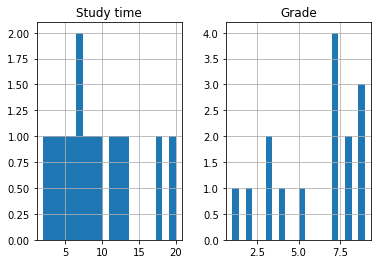

In [82]:
# your code here

time_grades.hist(bins=20)

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [95]:
# your code here

print(time_grades.corr(method='pearson'))
print(time_grades.corr(method='spearman'))
print(time_grades.corr(method='kendall'))

            Study time     Grade
Study time    1.000000  0.798046
Grade         0.798046  1.000000
            Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000
            Study time    Grade
Study time     1.00000  0.69786
Grade          0.69786  1.00000


In [ ]:
"""
your commments here

Is a possitive correlation.
For me the most adequate method is Pearson since is the most frequently used for normal distributed data.
Spearman's rank-order and Kendall's tau correlation coefficient are usually suggested for non-normal data.


Spearman: .81
Measures relationships between variables that are not necessarily linear. 
We are only looking at whether the data is moving in the same or the opposite direction.

Kendall: .69

"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

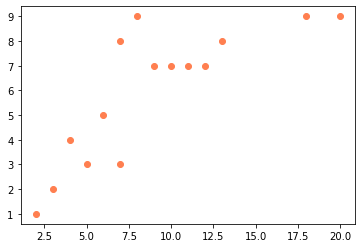

In [90]:
# your code here

x= time_grades['Study time']
y= time_grades['Grade']

plt.scatter(x, y, c='coral')


<AxesSubplot:xlabel='Study time', ylabel='Grade'>

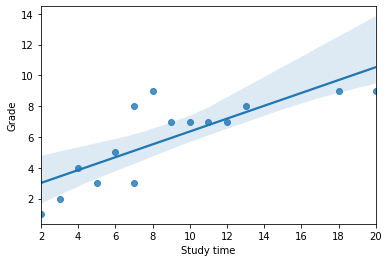

In [91]:
sns.regplot(x="Study time", y="Grade", data=time_grades)

In [ ]:
"""
your commments here

The linear regression plot confirms Visually the high positive correlation.
Styding more will increase your chances of a better note.

how much should I study: 

The minimum:
By studying between 8-13 minutes the grade is likely to be between 6.5 and 8.
The optimal:
The best grades were when studying between 7-8 minutes or between 18-20 minutes.

"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here

Pearson correlation is most frequently used for normal distributed data.

Spearman's rank-order measures relationships between variables that are not necessarily linear. 
It only looks at whether the data is moving in the same or the opposite direction.

"""